# Welcome to Week 3, Day 4

Hi class! Today we'll be using the Jupyter notebook to help you visualize some code and directly 
interact with your environment. 

## First we import the necessary dependencies

In [16]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Check that you can import the filename with no errors. 
Then highlight on the cell below and click cmd + enter or ctrl + enter, depending on your OS. 

In [2]:
#We will use this soon... 
from pandas import read_csv
filename = 'diabetes.csv'
names = ['pregnancies', 'glucose', 'bp', 'skinthick', 'insulin', 'bmi', 'diabetes', 'age', 'class']
dataframe = read_csv(filename, names=names, header=0, index_col=False)
#For class label 

array = dataframe.values
#print(array[:,0:8])
X = array[:,0:8]
print(X.shape)
#print(X)
Y = array[:,8]
#print(Y)
print(Y.shape)

(768, 8)
(768,)


## Sean Walks Through PCA -- Breast Cancer 

In [10]:
#Set Up The Data
breast = load_breast_cancer()
breast_data,breast_labels  = breast.data, breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  label  
0          0.4601                  0.11890    0.0  
1          0.2750                  0.08902    0.0  
2          0.3613                  0.08758    0.0  
3          0.6638                  0.17300    0.0  
4          0.2364                  0.07678    0.0  

[5 rows x 31 columns]

In [11]:
#Change Labels for Human Readability
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

#Normalize The Features with StandardScaler
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) 

#Confirm Normalization if Mean = 0 and STD is 1
np.mean(x),np.std(x)



(-6.826538293184326e-17, 1.0)

In [9]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.head()

#Now the Magic Happens with PCA. We are projecting our data into a new dimension! 

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

   feature7  feature8  feature9  ...  feature20  feature21  feature22  \
0  2.532475  2.217515  2.255747  ...   1.886690  -1.359293   2.303601   
1  0.548144  0.001392 -0.868652  ...   1.805927  -0.369203   1.535126   
2  2.037231  0.939685 -0.398008  ...   1.511870  -0.023974   1.347475   
3  1.451707  2.867383  4.910919  ...  -0.281464   0.133984  -0.249939   
4  1.428493 -0.009560 -0.562450  ...   1.298575  -1.466770   1.338539   

   feature23  feature24  feature25  feature26  feature27  feature28  feature29  
0   2.001237   1.307686   2.616665   2.109526   2.296076   2.750622   1.937015  
1   1.890489  -0.375612  -0.430444  -0.146749   1.087084  -0.243890   0.281190  
2   1.456285   0.527407   1.082932   0.854974   1.955000   1.152255   0.201391  
3  -0.550021   3.394275   3.893397   1.989588   2.175786   6.046041   4.935010  
4   1.220724   0.220556  -0.313395   0.613179   0.729259  -0.868353  -0.397100  

[5 rows x 30 columns]

In [14]:
#Now the Magic Happens with PCA.
#@We are projecting our data into a new dimension! 

from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)


principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.head()

## So we have our principal components! 

principal component 1  principal component 2
0               9.192837               1.948583
1               2.387802              -3.768172
2               5.733896              -1.075174
3               7.122953              10.275589
4               3.935302              -1.948072

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

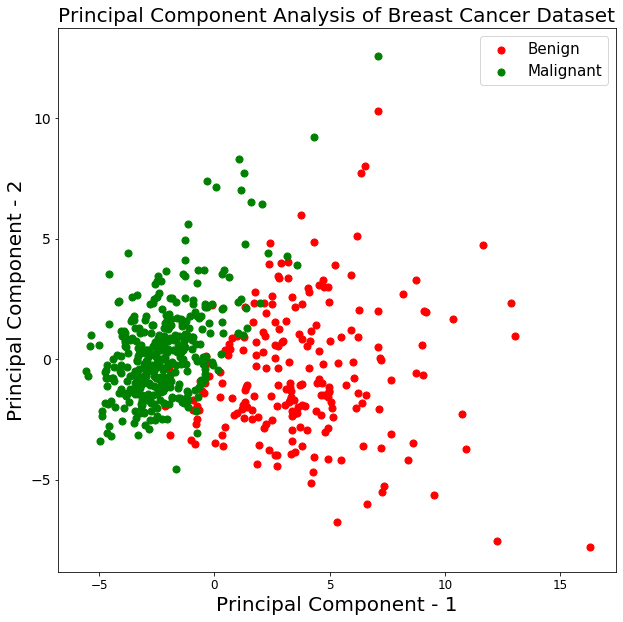

In [17]:
#We now can verbally "interpret" our PCA.... 
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

#And we can plot our axes
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### BUT THAT WAS A BLACK BOX, WASN'T IT? 
Let's check out how SciKit Learn Implemented It... 


In [18]:
#Source: https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/decomposition/_pca.py#L104
""" Principal Component Analysis
"""

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Denis A. Engemann <denis-alexander.engemann@inria.fr>
#         Michael Eickenberg <michael.eickenberg@inria.fr>
#         Giorgio Patrini <giorgio.patrini@anu.edu.au>
#
# License: BSD 3 clause

from math import log, sqrt
import numbers

import numpy as np
from scipy import linalg
from scipy.special import gammaln
from scipy.sparse import issparse
from scipy.sparse.linalg import svds

from ._base import _BasePCA
from ..utils import check_random_state
from ..utils import check_array
from ..utils.extmath import fast_logdet, randomized_svd, svd_flip
from ..utils.extmath import stable_cumsum
from ..utils.validation import check_is_fitted


def _assess_dimension_(spectrum, rank, n_samples, n_features):
    """Compute the likelihood of a rank ``rank`` dataset.
    The dataset is assumed to be embedded in gaussian noise of shape(n,
    dimf) having spectrum ``spectrum``.
    Parameters
    ----------
    spectrum : array of shape (n)
        Data spectrum.
    rank : int
        Tested rank value.
    n_samples : int
        Number of samples.
    n_features : int
        Number of features.
    Returns
    -------
    ll : float,
        The log-likelihood
    Notes
    -----
    This implements the method of `Thomas P. Minka:
    Automatic Choice of Dimensionality for PCA. NIPS 2000: 598-604`
    """
    if rank > len(spectrum):
        raise ValueError("The tested rank cannot exceed the rank of the"
                         " dataset")

    pu = -rank * log(2.)
    for i in range(rank):
        pu += (gammaln((n_features - i) / 2.) -
               log(np.pi) * (n_features - i) / 2.)

    pl = np.sum(np.log(spectrum[:rank]))
    pl = -pl * n_samples / 2.

    if rank == n_features:
        pv = 0
        v = 1
    else:
        v = np.sum(spectrum[rank:]) / (n_features - rank)
        pv = -np.log(v) * n_samples * (n_features - rank) / 2.

    m = n_features * rank - rank * (rank + 1.) / 2.
    pp = log(2. * np.pi) * (m + rank + 1.) / 2.

    pa = 0.
    spectrum_ = spectrum.copy()
    spectrum_[rank:n_features] = v
    for i in range(rank):
        for j in range(i + 1, len(spectrum)):
            pa += log((spectrum[i] - spectrum[j]) *
                      (1. / spectrum_[j] - 1. / spectrum_[i])) + log(n_samples)

    ll = pu + pl + pv + pp - pa / 2. - rank * log(n_samples) / 2.

    return ll


def _infer_dimension_(spectrum, n_samples, n_features):
    """Infers the dimension of a dataset of shape (n_samples, n_features)
    The dataset is described by its spectrum `spectrum`.
    """
    n_spectrum = len(spectrum)
    ll = np.empty(n_spectrum)
    for rank in range(n_spectrum):
        ll[rank] = _assess_dimension_(spectrum, rank, n_samples, n_features)
    return ll.argmax()


class PCA(_BasePCA):
    """Principal component analysis (PCA).
    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space. The input data is centered
    but not scaled for each feature before applying the SVD.
    It uses the LAPACK implementation of the full SVD or a randomized truncated
    SVD by the method of Halko et al. 2009, depending on the shape of the input
    data and the number of components to extract.
    It can also use the scipy.sparse.linalg ARPACK implementation of the
    truncated SVD.
    Notice that this class does not support sparse input. See
    :class:`TruncatedSVD` for an alternative with sparse data.
    Read more in the :ref:`User Guide <PCA>`.
    Parameters
    ----------
    n_components : int, float, None or str
        Number of components to keep.
        if n_components is not set all components are kept::
            n_components == min(n_samples, n_features)
        If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka's
        MLE is used to guess the dimension. Use of ``n_components == 'mle'``
        will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.
        If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
        number of components such that the amount of variance that needs to be
        explained is greater than the percentage specified by n_components.
        If ``svd_solver == 'arpack'``, the number of components must be
        strictly less than the minimum of n_features and n_samples.
        Hence, the None case results in::
            n_components == min(n_samples, n_features) - 1
    copy : bool, default=True
        If False, data passed to fit are overwritten and running
        fit(X).transform(X) will not yield the expected results,
        use fit_transform(X) instead.
    whiten : bool, optional (default False)
        When True (False by default) the `components_` vectors are multiplied
        by the square root of n_samples and then divided by the singular values
        to ensure uncorrelated outputs with unit component-wise variances.
        Whitening will remove some information from the transformed signal
        (the relative variance scales of the components) but can sometime
        improve the predictive accuracy of the downstream estimators by
        making their data respect some hard-wired assumptions.
    svd_solver : str {'auto', 'full', 'arpack', 'randomized'}
        If auto :
            The solver is selected by a default policy based on `X.shape` and
            `n_components`: if the input data is larger than 500x500 and the
            number of components to extract is lower than 80% of the smallest
            dimension of the data, then the more efficient 'randomized'
            method is enabled. Otherwise the exact full SVD is computed and
            optionally truncated afterwards.
        If full :
            run exact full SVD calling the standard LAPACK solver via
            `scipy.linalg.svd` and select the components by postprocessing
        If arpack :
            run SVD truncated to n_components calling ARPACK solver via
            `scipy.sparse.linalg.svds`. It requires strictly
            0 < n_components < min(X.shape)
        If randomized :
            run randomized SVD by the method of Halko et al.
        .. versionadded:: 0.18.0
    tol : float >= 0, optional (default .0)
        Tolerance for singular values computed by svd_solver == 'arpack'.
        .. versionadded:: 0.18.0
    iterated_power : int >= 0, or 'auto', (default 'auto')
        Number of iterations for the power method computed by
        svd_solver == 'randomized'.
        .. versionadded:: 0.18.0
    random_state : int, RandomState instance or None, optional (default None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`. Used when ``svd_solver`` == 'arpack' or 'randomized'.
        .. versionadded:: 0.18.0
    Attributes
    ----------
    components_ : array, shape (n_components, n_features)
        Principal axes in feature space, representing the directions of
        maximum variance in the data. The components are sorted by
        ``explained_variance_``.
    explained_variance_ : array, shape (n_components,)
        The amount of variance explained by each of the selected components.
        Equal to n_components largest eigenvalues
        of the covariance matrix of X.
        .. versionadded:: 0.18
    explained_variance_ratio_ : array, shape (n_components,)
        Percentage of variance explained by each of the selected components.
        If ``n_components`` is not set then all components are stored and the
        sum of the ratios is equal to 1.0.
    singular_values_ : array, shape (n_components,)
        The singular values corresponding to each of the selected components.
        The singular values are equal to the 2-norms of the ``n_components``
        variables in the lower-dimensional space.
        .. versionadded:: 0.19
    mean_ : array, shape (n_features,)
        Per-feature empirical mean, estimated from the training set.
        Equal to `X.mean(axis=0)`.
    n_components_ : int
        The estimated number of components. When n_components is set
        to 'mle' or a number between 0 and 1 (with svd_solver == 'full') this
        number is estimated from input data. Otherwise it equals the parameter
        n_components, or the lesser value of n_features and n_samples
        if n_components is None.
    n_features_ : int
        Number of features in the training data.
    n_samples_ : int
        Number of samples in the training data.
    noise_variance_ : float
        The estimated noise covariance following the Probabilistic PCA model
        from Tipping and Bishop 1999. See "Pattern Recognition and
        Machine Learning" by C. Bishop, 12.2.1 p. 574 or
        http://www.miketipping.com/papers/met-mppca.pdf. It is required to
        compute the estimated data covariance and score samples.
        Equal to the average of (min(n_features, n_samples) - n_components)
        smallest eigenvalues of the covariance matrix of X.
    See Also
    --------
    KernelPCA : Kernel Principal Component Analysis.
    SparsePCA : Sparse Principal Component Analysis.
    TruncatedSVD : Dimensionality reduction using truncated SVD.
    IncrementalPCA : Incremental Principal Component Analysis.
    References
    ----------
    For n_components == 'mle', this class uses the method of *Minka, T. P.
    "Automatic choice of dimensionality for PCA". In NIPS, pp. 598-604*
    Implements the probabilistic PCA model from:
    Tipping, M. E., and Bishop, C. M. (1999). "Probabilistic principal
    component analysis". Journal of the Royal Statistical Society:
    Series B (Statistical Methodology), 61(3), 611-622.
    via the score and score_samples methods.
    See http://www.miketipping.com/papers/met-mppca.pdf
    For svd_solver == 'arpack', refer to `scipy.sparse.linalg.svds`.
    For svd_solver == 'randomized', see:
    *Halko, N., Martinsson, P. G., and Tropp, J. A. (2011).
    "Finding structure with randomness: Probabilistic algorithms for
    constructing approximate matrix decompositions".
    SIAM review, 53(2), 217-288.* and also
    *Martinsson, P. G., Rokhlin, V., and Tygert, M. (2011).
    "A randomized algorithm for the decomposition of matrices".
    Applied and Computational Harmonic Analysis, 30(1), 47-68.*
    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.decomposition import PCA
    >>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    >>> pca = PCA(n_components=2)
    >>> pca.fit(X)
    PCA(n_components=2)
    >>> print(pca.explained_variance_ratio_)
    [0.9924... 0.0075...]
    >>> print(pca.singular_values_)
    [6.30061... 0.54980...]
    >>> pca = PCA(n_components=2, svd_solver='full')
    >>> pca.fit(X)
    PCA(n_components=2, svd_solver='full')
    >>> print(pca.explained_variance_ratio_)
    [0.9924... 0.00755...]
    >>> print(pca.singular_values_)
    [6.30061... 0.54980...]
    >>> pca = PCA(n_components=1, svd_solver='arpack')
    >>> pca.fit(X)
    PCA(n_components=1, svd_solver='arpack')
    >>> print(pca.explained_variance_ratio_)
    [0.99244...]
    >>> print(pca.singular_values_)
    [6.30061...]
    """

    def __init__(self, n_components=None, copy=True, whiten=False,
                 svd_solver='auto', tol=0.0, iterated_power='auto',
                 random_state=None):
        self.n_components = n_components
        self.copy = copy
        self.whiten = whiten
        self.svd_solver = svd_solver
        self.tol = tol
        self.iterated_power = iterated_power
        self.random_state = random_state

    def fit(self, X, y=None):
        """Fit the model with X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : None
            Ignored variable.
        Returns
        -------
        self : object
            Returns the instance itself.
        """
        self._fit(X)
        return self

    def fit_transform(self, X, y=None):
        """Fit the model with X and apply the dimensionality reduction on X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        y : None
            Ignored variable.
        Returns
        -------
        X_new : array-like, shape (n_samples, n_components)
            Transformed values.
        Notes
        -----
        This method returns a Fortran-ordered array. To convert it to a
        C-ordered array, use 'np.ascontiguousarray'.
        """
        U, S, V = self._fit(X)
        U = U[:, :self.n_components_]

        if self.whiten:
            # X_new = X * V / S * sqrt(n_samples) = U * sqrt(n_samples)
            U *= sqrt(X.shape[0] - 1)
        else:
            # X_new = X * V = U * S * V^T * V = U * S
            U *= S[:self.n_components_]

        return U

    def _fit(self, X):
        """Dispatch to the right submethod depending on the chosen solver."""

        # Raise an error for sparse input.
        # This is more informative than the generic one raised by check_array.
        if issparse(X):
            raise TypeError('PCA does not support sparse input. See '
                            'TruncatedSVD for a possible alternative.')

        X = check_array(X, dtype=[np.float64, np.float32], ensure_2d=True,
                        copy=self.copy)

        # Handle n_components==None
        if self.n_components is None:
            if self.svd_solver != 'arpack':
                n_components = min(X.shape)
            else:
                n_components = min(X.shape) - 1
        else:
            n_components = self.n_components

        # Handle svd_solver
        self._fit_svd_solver = self.svd_solver
        if self._fit_svd_solver == 'auto':
            # Small problem or n_components == 'mle', just call full PCA
            if max(X.shape) <= 500 or n_components == 'mle':
                self._fit_svd_solver = 'full'
            elif n_components >= 1 and n_components < .8 * min(X.shape):
                self._fit_svd_solver = 'randomized'
            # This is also the case of n_components in (0,1)
            else:
                self._fit_svd_solver = 'full'

        # Call different fits for either full or truncated SVD
        if self._fit_svd_solver == 'full':
            return self._fit_full(X, n_components)
        elif self._fit_svd_solver in ['arpack', 'randomized']:
            return self._fit_truncated(X, n_components, self._fit_svd_solver)
        else:
            raise ValueError("Unrecognized svd_solver='{0}'"
                             "".format(self._fit_svd_solver))

    def _fit_full(self, X, n_components):
        """Fit the model by computing full SVD on X"""
        n_samples, n_features = X.shape

        if n_components == 'mle':
            if n_samples < n_features:
                raise ValueError("n_components='mle' is only supported "
                                 "if n_samples >= n_features")
        elif not 0 <= n_components <= min(n_samples, n_features):
            raise ValueError("n_components=%r must be between 0 and "
                             "min(n_samples, n_features)=%r with "
                             "svd_solver='full'"
                             % (n_components, min(n_samples, n_features)))
        elif n_components >= 1:
            if not isinstance(n_components, numbers.Integral):
                raise ValueError("n_components=%r must be of type int "
                                 "when greater than or equal to 1, "
                                 "was of type=%r"
                                 % (n_components, type(n_components)))

        # Center data
        self.mean_ = np.mean(X, axis=0)
        X -= self.mean_

        U, S, V = linalg.svd(X, full_matrices=False)
        # flip eigenvectors' sign to enforce deterministic output
        U, V = svd_flip(U, V)

        components_ = V

        # Get variance explained by singular values
        explained_variance_ = (S ** 2) / (n_samples - 1)
        total_var = explained_variance_.sum()
        explained_variance_ratio_ = explained_variance_ / total_var
        singular_values_ = S.copy()  # Store the singular values.

        # Postprocess the number of components required
        if n_components == 'mle':
            n_components = \
                _infer_dimension_(explained_variance_, n_samples, n_features)
        elif 0 < n_components < 1.0:
            # number of components for which the cumulated explained
            # variance percentage is superior to the desired threshold
            ratio_cumsum = stable_cumsum(explained_variance_ratio_)
            n_components = np.searchsorted(ratio_cumsum, n_components) + 1

        # Compute noise covariance using Probabilistic PCA model
        # The sigma2 maximum likelihood (cf. eq. 12.46)
        if n_components < min(n_features, n_samples):
            self.noise_variance_ = explained_variance_[n_components:].mean()
        else:
            self.noise_variance_ = 0.

        self.n_samples_, self.n_features_ = n_samples, n_features
        self.components_ = components_[:n_components]
        self.n_components_ = n_components
        self.explained_variance_ = explained_variance_[:n_components]
        self.explained_variance_ratio_ = \
            explained_variance_ratio_[:n_components]
        self.singular_values_ = singular_values_[:n_components]

        return U, S, V

    def _fit_truncated(self, X, n_components, svd_solver):
        """Fit the model by computing truncated SVD (by ARPACK or randomized)
        on X
        """
        n_samples, n_features = X.shape

        if isinstance(n_components, str):
            raise ValueError("n_components=%r cannot be a string "
                             "with svd_solver='%s'"
                             % (n_components, svd_solver))
        elif not 1 <= n_components <= min(n_samples, n_features):
            raise ValueError("n_components=%r must be between 1 and "
                             "min(n_samples, n_features)=%r with "
                             "svd_solver='%s'"
                             % (n_components, min(n_samples, n_features),
                                svd_solver))
        elif not isinstance(n_components, numbers.Integral):
            raise ValueError("n_components=%r must be of type int "
                             "when greater than or equal to 1, was of type=%r"
                             % (n_components, type(n_components)))
        elif svd_solver == 'arpack' and n_components == min(n_samples,
                                                            n_features):
            raise ValueError("n_components=%r must be strictly less than "
                             "min(n_samples, n_features)=%r with "
                             "svd_solver='%s'"
                             % (n_components, min(n_samples, n_features),
                                svd_solver))

        random_state = check_random_state(self.random_state)

        # Center data
        self.mean_ = np.mean(X, axis=0)
        X -= self.mean_

        if svd_solver == 'arpack':
            # random init solution, as ARPACK does it internally
            v0 = random_state.uniform(-1, 1, size=min(X.shape))
            U, S, V = svds(X, k=n_components, tol=self.tol, v0=v0)
            # svds doesn't abide by scipy.linalg.svd/randomized_svd
            # conventions, so reverse its outputs.
            S = S[::-1]
            # flip eigenvectors' sign to enforce deterministic output
            U, V = svd_flip(U[:, ::-1], V[::-1])

        elif svd_solver == 'randomized':
            # sign flipping is done inside
            U, S, V = randomized_svd(X, n_components=n_components,
                                     n_iter=self.iterated_power,
                                     flip_sign=True,
                                     random_state=random_state)

        self.n_samples_, self.n_features_ = n_samples, n_features
        self.components_ = V
        self.n_components_ = n_components

        # Get variance explained by singular values
        self.explained_variance_ = (S ** 2) / (n_samples - 1)
        total_var = np.var(X, ddof=1, axis=0)
        self.explained_variance_ratio_ = \
            self.explained_variance_ / total_var.sum()
        self.singular_values_ = S.copy()  # Store the singular values.

        if self.n_components_ < min(n_features, n_samples):
            self.noise_variance_ = (total_var.sum() -
                                    self.explained_variance_.sum())
            self.noise_variance_ /= min(n_features, n_samples) - n_components
        else:
            self.noise_variance_ = 0.

        return U, S, V

    def score_samples(self, X):
        """Return the log-likelihood of each sample.
        See. "Pattern Recognition and Machine Learning"
        by C. Bishop, 12.2.1 p. 574
        or http://www.miketipping.com/papers/met-mppca.pdf
        Parameters
        ----------
        X : array, shape(n_samples, n_features)
            The data.
        Returns
        -------
        ll : array, shape (n_samples,)
            Log-likelihood of each sample under the current model.
        """
        check_is_fitted(self)

        X = check_array(X)
        Xr = X - self.mean_
        n_features = X.shape[1]
        precision = self.get_precision()
        log_like = -.5 * (Xr * (np.dot(Xr, precision))).sum(axis=1)
        log_like -= .5 * (n_features * log(2. * np.pi) -
                          fast_logdet(precision))
        return log_like

    def score(self, X, y=None):
        """Return the average log-likelihood of all samples.
        See. "Pattern Recognition and Machine Learning"
        by C. Bishop, 12.2.1 p. 574
        or http://www.miketipping.com/papers/met-mppca.pdf
        Parameters
        ----------
        X : array, shape(n_samples, n_features)
            The data.
        y : None
            Ignored variable.
        Returns
        -------
        ll : float
            Average log-likelihood of the samples under the current model.
        """
        return np.mean(self.score_samples(X))

ModuleNotFoundError: No module named '__main__._base'; '__main__' is not a package

### Challenge: Implement your own PCA algorithm from scratch### 
In 1 hour, with your partner, you will try to get a working PCA algorithm from scratch. 
Criteria: 
Level 1: Pseudo code logic
Level 2: Code written, but not functional. 
Level 3: Functional Code that can accept input as the diabetes data that I had prepared above
Level 4: You plot principal components beautifully.  